# In-class Linear Regression Demo
## Learning Objectives:
- Identify a Target Variable
- Identify independent and explanatory variables
- Explore the Scikit-learn linear regression API: `.fit`/`.predict`
- Visualize our predictions
- Find our residuals
- Compute MSE
- Compute and interpret R-squared

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We'll use a dataset from [this website](http://users.stat.ufl.edu/~winner/datasets.html)

## Single Linear Regression:

In [1]:
# LSD and Math Scores
# http://users.stat.ufl.edu/~winner/data/lsd.txt
lsd = pd.read_csv('http://users.stat.ufl.edu/~winner/data/lsd.dat',
            names=['LSD','Math'], sep='\s+',
            header=None)

In [2]:
# check out the data frame
lsd

,LSD,Math
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65
5,6.00,32.92
6,6.41,29.97


In [3]:
# get the info on the data
lsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
LSD     7 non-null float64
Math    7 non-null float64
dtypes: float64(2)
memory usage: 240.0 bytes


In [4]:
# shape of the data
lsd.shape

(7, 2)

In [5]:
# summary/descriptive statistics of the data
lsd.describe()

,LSD,Math
count,7.000000,7.000000
mean,4.332857,50.087143
std,1.935413,18.610854
min,1.170000,29.970000
25%,3.115000,35.195000
50%,4.690000,45.650000
75%,5.915000,62.835000
max,6.410000,78.930000


In [6]:
# missing values
lsd.isnull().sum()

LSD     0
Math    0
dtype: int64

In [25]:
# create x and y
X = lsd['LSD']
y = lsd['Math']

In [26]:
X

0    1.17
1    2.97
2    3.26
3    4.69
4    5.83
5    6.00
6    6.41
Name: LSD, dtype: float64

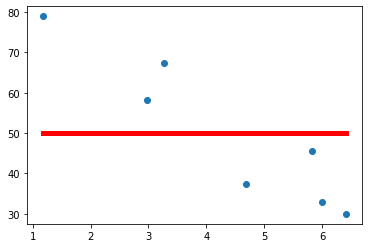

In [10]:
# scatter plot of minimum and maximum values of x and mean of y 
plt.scatter(X,y)
plt.plot([X.min(), X.max()], [y.mean(), y.mean()], c='r', linewidth=5.0);

In [11]:
# average math score
y.mean()

50.08714285714286

In [12]:
# type of x
type(X)

pandas.core.series.Series

In [27]:
X.values

array([1.17, 2.97, 3.26, 4.69, 5.83, 6.  , 6.41])

In [28]:
# Annoying transformation need if you only have one feature. No idea why they won't fix it.
X = X.values.reshape(-1,1)

 # Not stricly necessary
y = y.values    

In [23]:
X

array([[1.17],
       [2.97],
       [3.26],
       [4.69],
       [5.83],
       [6.  ],
       [6.41]])

In [29]:
y

array([78.93, 58.2 , 67.47, 37.47, 45.65, 32.92, 29.97])

Stack Overflow thread - [What does -1 mean in numpy reshape?](https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape)

In [30]:
# type of x after reshape
type(X)

numpy.ndarray

In [13]:
# import linear regression
from sklearn.linear_model import LinearRegression

In [14]:
# Define a linear regression model
linreg = LinearRegression()

In [31]:
# Fit the model
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
# What is the coefficient?
linreg.coef_

array([-9.00946642])

In [34]:
# What is the intercept?
linreg.intercept_

89.12387376799308

In [35]:
# Create the prediction 
y_pred = linreg.intercept_ + linreg.coef_*X
y_pred

array([[78.58279806],
       [62.36575851],
       [59.75301325],
       [46.86947628],
       [36.59868457],
       [35.06707528],
       [31.37319405]])

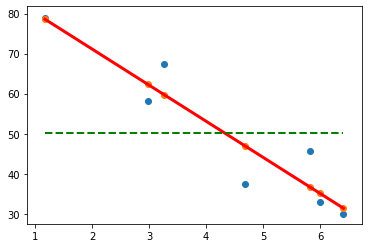

In [39]:
# Let's plot the prediction line
plt.scatter(X,y)
plt.plot(X, y_pred, c='r', linewidth=3.0)
plt.plot([X.min(), X.max()], [y.mean(), y.mean()], 'g--', linewidth=2.0)
plt.scatter(X, y_pred);

In [40]:
# Let's make predictions on our data
y_hat = linreg.predict(X)
y_hat

array([78.58279806, 62.36575851, 59.75301325, 46.86947628, 36.59868457,
       35.06707528, 31.37319405])

In [43]:
linreg.predict([[-10]])

array([179.21853792])

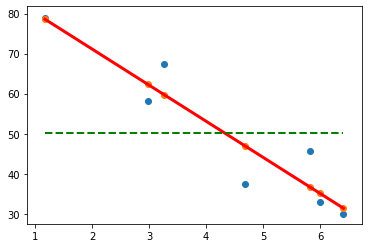

In [45]:
# Plot those predicted values, which is the same as plotting the model:
# Plot on on top of the actual values
plt.scatter(X,y)
plt.plot(X, y_pred, c='r', linewidth=3.0)
plt.plot([X.min(), X.max()], [y.mean(), y.mean()], 'g--', linewidth=2.0)
plt.scatter(X, y_hat);

In [46]:
# Calculate residuals with those predicted values:
residuals = y_hat - y
residuals

array([-0.34720194,  4.16575851, -7.71698675,  9.39947628, -9.05131543,
        2.14707528,  1.40319405])

In [49]:
list(zip(y_hat, y))

[(78.58279806209583, 78.93),
 (62.36575851456162, 58.2),
 (59.75301325412556, 67.47),
 (46.86947628025115, 37.47),
 (36.598684566812814, 45.65),
 (35.067075276212364, 32.92),
 (31.37319404594068, 29.97)]

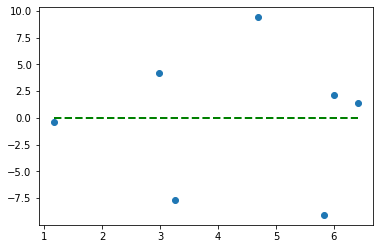

In [55]:
# Plotting the residuals with the null model (average score)
plt.scatter(X, residuals)
plt.plot([X.min(), X.max()], [0,0], 'g--', linewidth=2.0);

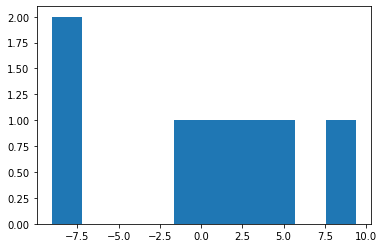

In [57]:
# Plot the residuals by themselves.
# Are they normally distributed? Who knows.
plt.hist(residuals);

In [58]:
# import MSE
from sklearn.metrics import mean_squared_error

In [59]:
# Let's get the MSE
mean_squared_error(y, y_hat)

36.26876125852443

In [64]:
# RMSE for the Linear Regression model
np.sqrt(mean_squared_error(y, y_hat))

6.022355125573751

In [61]:
# the baseline of a linear regression model
y_null = np.ones_like(y) * y.mean()
y_null

array([50.08714286, 50.08714286, 50.08714286, 50.08714286, 50.08714286,
       50.08714286, 50.08714286])

In [62]:
# MSE of the baseline (null model)
mean_squared_error(y, y_null)

296.8833346938776

In [63]:
# RMSE of the baseline (null model)
np.sqrt(mean_squared_error(y, y_null))

17.23030280331363

In [66]:
# What is rhe R-squared score?
linreg.score(X,y)

0.8778349707775889

$R^{2}$ is the percentage of explained variance - how much of the variance in our target variabe (y) we can explain with our model (using our feature matrix)